# Leveraging Machine Learning to Analyze Social Media Use and Understanding the General Behavior in ADHD Communities

### Tisha JillianTara Nirmala Kusuma
### Ghinaa Zain Nabiilah
### Jurike V Moniaga

# Data Description

In [ ]:
# Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dataset load

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1W3H9rUcZSTEflU7SDIArJ47vB8OeyTn6/view'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('socialMediaMentalHealth.csv')

data=pd.read_csv('socialMediaMentalHealth.csv')

In [ ]:
# Setting to display all columns of a DataFrame when printing or overriding
pd.set_option("display.max_columns", None)

In [ ]:
# Showing the first 5 entries in the data set
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [ ]:
# Showing the last 5 entries in the data set
data.tail()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4
480,11/12/2022 13:16:50,53.0,Male,Married,Salaried Worker,Private,Yes,"Facebook, YouTube",Less than an Hour,2,3,1,3,1,1,3,3,2,2,2,3


In [ ]:
# Numbers of rows and columns (dimension)
data.shape

(481, 21)

# Data Preprocessing and Cleaning

In [ ]:
# Rename columns to increase readability
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Gender','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent per Day',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

In [ ]:
# Assigning the new column names
titles = list(data.columns)
titles

['Timestamp',
 'Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent per Day',
 'ADHD Q1',
 'ADHD Q2',
 'Anxiety Q1',
 'ADHD Q3',
 'Anxiety Q2',
 'ADHD Q4',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [ ]:
# Rearranging some Anxiety and ADHD columns to keep it sequencial
titles[11], titles[12] = titles[12], titles[11]
titles[12], titles[14] = titles[14], titles[12]
titles[13], titles[14] = titles[14], titles[13]
data = data[titles]
titles

['Timestamp',
 'Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent per Day',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

# Dropping Irrelevant Columns

In [ ]:
# Drop columns that are not relevant to this research
# to_drop = ['Timestamp',
#           'Affiliations',
#           'Anxiety Q1',
#           'Anxiety Q2',
#           'Self Esteem Q1',
#           'Self Esteem Q2',
#           'Self Esteem Q3',
#           'Depression Q1',
#           'Depression Q2',
#           'Depression Q3']

to_drop = ['Timestamp',
          'Affiliations']

data.drop(to_drop, inplace=True, axis=1)

In [ ]:
# Print the column to see if it has been done right
titles = list(data.columns)
titles

['Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Social Media User?',
 'Platforms Used',
 'Time Spent per Day',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [ ]:
# Numbers of rows and columns (dimension) after dropping few columns
data.shape

(481, 19)

# Check for Missing Value and Its Treatment

In [ ]:
# Check for missing values
missing_values = data.isna().sum()
print(missing_values)

Age                    0
Gender                 0
Relationship Status    0
Occupation             0
Social Media User?     0
Platforms Used         0
Time Spent per Day     0
ADHD Q1                0
ADHD Q2                0
ADHD Q3                0
ADHD Q4                0
Anxiety Q1             0
Anxiety Q2             0
Self Esteem Q1         0
Self Esteem Q2         0
Self Esteem Q3         0
Depression Q1          0
Depression Q2          0
Depression Q3          0
dtype: int64


In [ ]:
# Check for null values of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  481 non-null    float64
 1   Gender               481 non-null    object 
 2   Relationship Status  481 non-null    object 
 3   Occupation           481 non-null    object 
 4   Social Media User?   481 non-null    object 
 5   Platforms Used       481 non-null    object 
 6   Time Spent per Day   481 non-null    object 
 7   ADHD Q1              481 non-null    int64  
 8   ADHD Q2              481 non-null    int64  
 9   ADHD Q3              481 non-null    int64  
 10  ADHD Q4              481 non-null    int64  
 11  Anxiety Q1           481 non-null    int64  
 12  Anxiety Q2           481 non-null    int64  
 13  Self Esteem Q1       481 non-null    int64  
 14  Self Esteem Q2       481 non-null    int64  
 15  Self Esteem Q3       481 non-null    int

# Data Transformation

Check 'Gender' column

In [ ]:
# There are some answer format that is inconsistent
# We will transform the data into a same format as the majority of the data

# Show all the unique Gender entries
Genders = set(data['Gender'])
print(Genders)

{'Female', 'Non binary ', 'There are others???', 'Trans', 'Non-binary', 'Nonbinary ', 'Male', 'NB', 'unsure '}


In [ ]:
# Dropping 'There are others???' because it seems like that person is unserious on taking this survey
data.drop(data.loc[data['Gender'] =='There are others???'].index, inplace=True)

In [ ]:
Genders = set(data['Gender'])
print(Genders)

{'Female', 'Non binary ', 'Trans', 'Non-binary', 'Nonbinary ', 'Male', 'NB', 'unsure '}


In [ ]:
# Combining types other than 'Male' and 'Female' to 'Others' category
data.replace('Non-binary','Others', inplace=True)
data.replace('Nonbinary ','Others', inplace=True)
data.replace('NB','Others', inplace=True)
data.replace('unsure ','Others', inplace=True)
data.replace('Non binary ','Others', inplace=True)
data.replace('Trans','Others', inplace=True)

In [ ]:
Genders = set(data['Gender'])
print(Genders)

{'Male', 'Female', 'Others'}


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  480 non-null    float64
 1   Gender               480 non-null    object 
 2   Relationship Status  480 non-null    object 
 3   Occupation           480 non-null    object 
 4   Social Media User?   480 non-null    object 
 5   Platforms Used       480 non-null    object 
 6   Time Spent per Day   480 non-null    object 
 7   ADHD Q1              480 non-null    int64  
 8   ADHD Q2              480 non-null    int64  
 9   ADHD Q3              480 non-null    int64  
 10  ADHD Q4              480 non-null    int64  
 11  Anxiety Q1           480 non-null    int64  
 12  Anxiety Q2           480 non-null    int64  
 13  Self Esteem Q1       480 non-null    int64  
 14  Self Esteem Q2       480 non-null    int64  
 15  Self Esteem Q3       480 non-null    int64  


Check 'Age' column

In [ ]:
# The data type of 'Age' column detected as float64
non_integer_age_rows = data[~data['Age'].apply(lambda x: x.is_integer())]

In [ ]:
# Display the rows with non-integer 'Age' values
print(non_integer_age_rows)

      Age  Gender Relationship Status          Occupation Social Media User?  \
382  26.7  Female              Single  University Student                Yes   

        Platforms Used Time Spent per Day  ADHD Q1  ADHD Q2  ADHD Q3  ADHD Q4  \
382  Facebook, YouTube  More than 5 hours        4        2        3        3   

     Anxiety Q1  Anxiety Q2  Self Esteem Q1  Self Esteem Q2  Self Esteem Q3  \
382           2           5               5               2               3   

     Depression Q1  Depression Q2  Depression Q3  
382              4              5              5  


In [ ]:
# Convert the #382 data from float64 to int64
data['Age'] = data['Age'].astype('int64')
data.loc[382,'Age']

26

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  480 non-null    int64 
 1   Gender               480 non-null    object
 2   Relationship Status  480 non-null    object
 3   Occupation           480 non-null    object
 4   Social Media User?   480 non-null    object
 5   Platforms Used       480 non-null    object
 6   Time Spent per Day   480 non-null    object
 7   ADHD Q1              480 non-null    int64 
 8   ADHD Q2              480 non-null    int64 
 9   ADHD Q3              480 non-null    int64 
 10  ADHD Q4              480 non-null    int64 
 11  Anxiety Q1           480 non-null    int64 
 12  Anxiety Q2           480 non-null    int64 
 13  Self Esteem Q1       480 non-null    int64 
 14  Self Esteem Q2       480 non-null    int64 
 15  Self Esteem Q3       480 non-null    int64 
 16  Depression Q1

Check 'Age' column again for outliers

In [ ]:
# Check 'Age' column again for outliers
Age_counts = data['Age'].value_counts()

# Sort the index (ages) in ascending order
Age_counts = Age_counts.sort_index(ascending=True)

# Show the counts in ascending order
print("Counts Age (Ascending Order):")
print(Age_counts)

Counts Age (Ascending Order):
Age
13     2
14     4
15     2
16     2
17     9
18    13
19    19
20    45
21    82
22    80
23    42
24    27
25    17
26    19
27    11
28     5
29     6
30     6
31     1
32     4
33     2
34     6
35     8
36     3
37     4
38     3
40     2
42     1
43     1
44     2
45     1
46     2
47    16
48    13
49     3
50     6
51     2
52     1
53     1
55     1
56     2
60     1
65     1
69     1
91     1
Name: count, dtype: int64


In [ ]:
# Find row where 'Age' equals 91
age_answers = data[data['Age'] == 91]

# Print the row
print("Rows with Age equal to 91:")
print(age_answers)

Rows with Age equal to 91:
     Age  Gender Relationship Status          Occupation Social Media User?  \
256   91  Female              Single  University Student                Yes   

                                      Platforms Used     Time Spent per Day  \
256  Facebook, Instagram, YouTube, Snapchat, Discord  Between 2 and 3 hours   

     ADHD Q1  ADHD Q2  ADHD Q3  ADHD Q4  Anxiety Q1  Anxiety Q2  \
256        2        5        4        5           4           5   

     Self Esteem Q1  Self Esteem Q2  Self Esteem Q3  Depression Q1  \
256               5               1               5              5   

     Depression Q2  Depression Q3  
256              5              5  


In [ ]:
# There seems to be a large jump from 69 to 91,
# and the data's occupation is 'University Student',
# we assume this to be a TYPO

# Change age from 91 to 19
data.loc[data['Age'] == 91, 'Age'] = 19

In [ ]:
# Check the age change

print("Data No. 256:")
print(data.iloc[256])

Data No. 256:
Age                                                                 19
Gender                                                          Female
Relationship Status                                             Single
Occupation                                          University Student
Social Media User?                                                 Yes
Platforms Used         Facebook, Instagram, YouTube, Snapchat, Discord
Time Spent per Day                               Between 2 and 3 hours
ADHD Q1                                                              2
ADHD Q2                                                              5
ADHD Q3                                                              4
ADHD Q4                                                              5
Anxiety Q1                                                           4
Anxiety Q2                                                           5
Self Esteem Q1                                                 

Check 'Social Media User?' column

In [ ]:
# Check for inconsistency
social_media_user_counts = data['Social Media User?'].value_counts()

# Show the amounts
print("Counts of 'Social Media User?':")
print(social_media_user_counts)

Counts of 'Social Media User?':
Social Media User?
Yes    477
No       3
Name: count, dtype: int64


In [ ]:
# Find which rows have answered 'No'
no_answers = data[data['Social Media User?'] == 'No']

# Show the rows with 'No' answers
print("Rows with 'No' answers:")
print(no_answers)

Rows with 'No' answers:
     Age Gender Relationship Status          Occupation Social Media User?  \
9     20   Male              Single  University Student                 No   
54    26   Male   In a relationship     Salaried Worker                 No   
134   50   Male            Divorced     Salaried Worker                 No   

               Platforms Used     Time Spent per Day  ADHD Q1  ADHD Q2  \
9           Reddit, Pinterest      Less than an Hour        1        1   
54   YouTube, Discord, Reddit  Between 1 and 2 hours        4        1   
134        Instagram, YouTube  Between 1 and 2 hours        2        1   

     ADHD Q3  ADHD Q4  Anxiety Q1  Anxiety Q2  Self Esteem Q1  Self Esteem Q2  \
9          1        1           1           1               1               1   
54         2        1           1           2               1               3   
134        2        2           1           2               1               4   

     Self Esteem Q3  Depression Q1  Depre

In [ ]:
# There are 3 people that answered 'No',
# but they also input social media platform that they used

# Update the values of the rows from 'No' to 'Yes'
data.loc[data['Social Media User?'] == 'No', 'Social Media User?'] = 'Yes'

In [ ]:
# Check if the changes was made
social_media_user_counts = data['Social Media User?'].value_counts()

# Show the amounts
print("Counts of 'Social Media User?':")
print(social_media_user_counts)

Counts of 'Social Media User?':
Social Media User?
Yes    480
Name: count, dtype: int64


In [ ]:
# Rename the whole 'Social Media Platform' column's values

# 'Social Networking' like platforms are "Facebook", "Twitter", "Discord", TikTok"
# 'Media Sharing' like platforms are "Pinterest", "Youtube", "Snapchat", "Instagram"
# 'Discussion Forum' like platform is "Reddit"

# Define a function that will be used to categorize platforms
def categorize_platforms(platforms_used):
    categories = []
    if any(platform in platforms_used for platform in ['Facebook', 'Twitter', 'Discord', 'TikTok']):
        categories.append('Social Networks')
    if any(platform in platforms_used for platform in ['Pinterest', 'YouTube', 'Snapchat', 'Instagram']):
        categories.append('Media Sharing Networks')
    if 'Reddit' in platforms_used:
        categories.append('Discussion Forum')
    return ', '.join(categories) if categories else 'Other/Unknown'

# Apply the function to the new column 'Platforms'
data['Platforms'] = data['Platforms Used'].apply(categorize_platforms)

# Drop the original 'Platforms Used' column
data.drop(columns=['Platforms Used'], inplace=True)

# Display the DataFrame with the 'Platforms' column
print(data)

     Age  Gender Relationship Status          Occupation Social Media User?  \
0     21    Male   In a relationship  University Student                Yes   
1     21  Female              Single  University Student                Yes   
2     21  Female              Single  University Student                Yes   
3     21  Female              Single  University Student                Yes   
4     21  Female              Single  University Student                Yes   
..   ...     ...                 ...                 ...                ...   
476   24    Male              Single     Salaried Worker                Yes   
477   26  Female             Married     Salaried Worker                Yes   
478   29  Female             Married     Salaried Worker                Yes   
479   21    Male              Single  University Student                Yes   
480   53    Male             Married     Salaried Worker                Yes   

        Time Spent per Day  ADHD Q1  ADHD Q2  ADHD 

Check 'Occupation' column and 'Age' column

In [ ]:
data.loc[(data['Occupation'] == 'School Student') & (data['Age'] > 18)]

,Age,Gender,Relationship Status,Occupation,Social Media User?,Time Spent per Day,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3,Platforms
17,25,Male,Single,School Student,Yes,Between 4 and 5 hours,5,5,4,3,4,3,1,4,2,2,2,2,"Social Networks, Media Sharing Networks, Discu..."
43,19,Female,Single,School Student,Yes,More than 5 hours,3,2,4,4,4,5,5,2,1,5,4,2,"Social Networks, Media Sharing Networks"
57,19,Female,Single,School Student,Yes,Between 2 and 3 hours,3,2,2,3,2,4,3,3,2,4,4,5,"Social Networks, Media Sharing Networks"
65,24,Male,In a relationship,School Student,Yes,Between 1 and 2 hours,3,2,3,2,4,2,1,3,2,2,4,4,"Social Networks, Media Sharing Networks, Discu..."
71,23,Male,Single,School Student,Yes,Between 2 and 3 hours,5,5,5,5,5,5,5,5,5,5,5,5,"Social Networks, Media Sharing Networks, Discu..."
97,20,Male,Single,School Student,Yes,More than 5 hours,4,2,2,1,1,1,2,2,1,4,3,2,"Media Sharing Networks, Discussion Forum"
98,22,Female,Single,School Student,Yes,More than 5 hours,4,4,4,5,4,4,5,3,4,5,5,3,"Social Networks, Media Sharing Networks"
159,19,Female,In a relationship,School Student,Yes,Between 4 and 5 hours,5,4,3,4,4,5,2,5,4,4,5,5,Social Networks
191,19,Female,Single,School Student,Yes,Between 2 and 3 hours,3,4,3,3,3,3,3,5,3,4,3,1,"Social Networks, Media Sharing Networks"
205,20,Male,Single,School Student,Yes,Between 2 and 3 hours,3,2,2,2,3,3,3,2,3,2,1,4,"Social Networks, Media Sharing Networks, Discu..."


In [ ]:
# There are many people listed with 'School Student' occupation has the age above 18
# We can update their occupation and assume them to be 'University Student'
data.loc[(data['Occupation'] == 'School Student') & (data['Age'] > 18), 'Occupation'] = 'University Student'

Scalar Adjustment for Self Esteem #2 question

In [ ]:
# Higher scores equal worse mental health.
# Lower scores equal better mental health.

# Before summing the scores, we must fix an issue on Self Esteem #2 question

# All other question follow a scale like this:
# 1 = very negative
# 2 = negative
# 3 = netral
# 4 = positive
# 5 = very positive

# The question was: "Following the previous question, how do you feel about these comparisons, generally speaking?"
# Since higher score equal worse mental health, and in this question, a higher score equals more postive or better mental health,
# the scale needs to be reversed to:
# 5 = very negative
# 4 = slightly negative
# 3 = neutral
# 2 = slightly positive
# 1 = very positive

# Setting scale scores
data.loc[data['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 5
data.loc[data['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 4
data.loc[data['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 3
data.loc[data['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 2
data.loc[data['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 1

# Summation of Each Scores

In [ ]:
# There are 4 questions for ADHD,
# and per question has the maximum score of 5
# Hence, the maximum score for ADHD is 20
# ADHD Scores in Total
ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
data['ADHD Score'] = data[ADHD].sum(axis=1)

# There are 2 questions for Anxiety,
# and per question has the maximum score of 5
# Hence, the maximum score for Anxiety is 10
# Anxiety Scores in Total
Anxiety = ['Anxiety Q1', 'Anxiety Q2']
data['Anxiety Score'] = data[Anxiety].sum(axis=1)

# There are 3 questions for Self Esteem,
# and per question has the maximum score of 5
# Hence, the maximum score for Self Esteem is 15
# Self Esteem Scores in Total
SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2','Self Esteem Q3']
data['Self Esteem Score'] = data[SelfEsteem].sum(axis=1)

# There are 3 questions for Depression,
# and per question has the maximum score of 5
# Hence, the maximum score for Depression is 15
# Depression Scores in Total
Depression = ['Depression Q1', 'Depression Q2','Depression Q3']
data['Depression Score'] = data[Depression].sum(axis=1)

# # Sum of All Scores other than ADHD
# Total = ['Anxiety Score', 'Self Esteem Score', 'Depression Score']
# data['non-ADHD Score'] = data[Total].sum(axis=1)

# Sum of All Scores
Total = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score']
data['Total Score'] = data[Total].sum(axis=1)

# Deleting question columns as they are no longer used
data.drop(columns=ADHD + Anxiety + SelfEsteem + Depression, inplace=True)

In [ ]:
data.head(5)

,Age,Gender,Relationship Status,Occupation,Social Media User?,Time Spent per Day,Platforms,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,Yes,Between 2 and 3 hours,"Social Networks, Media Sharing Networks, Discu...",18,4,7,14,43
1,21,Female,Single,University Student,Yes,More than 5 hours,"Social Networks, Media Sharing Networks, Discu...",15,7,7,14,43
2,21,Female,Single,University Student,Yes,Between 3 and 4 hours,"Social Networks, Media Sharing Networks",11,6,7,11,35
3,21,Female,Single,University Student,Yes,More than 5 hours,"Social Networks, Media Sharing Networks",12,6,8,9,35
4,21,Female,Single,University Student,Yes,Between 2 and 3 hours,"Social Networks, Media Sharing Networks",17,9,9,9,44


# Create New Column

Categorize Datas based on 'Total Scores' to Create New Column 'All Outcome'

In [ ]:
# # Function to categorize the 'All Outcome' based on 'Total Scores'
# # If the score are 3 out of 5, we assume that someone has experience severe ADHD, Anxiety, Self Esteem, and Depression symptoms
# # Since there are 4+2+3+3 questions -> Hence ->  3*12 = 36
# # We round 36 up to 40 for
# # Explanation: We assume that if Total Scores
# # LOWER THAN 12 -> 0 -> Means that person is least likely to have ADHD symptoms
# # HIGHER THAN OR EQUAL TO 12 -> 1 -> Means that person is most likely to have ADHD symptoms
# def map_score(score):
#   if score < 40:
#     return "0"
#   elif score >= 40:
#     return "1"

# data['All Outcome']= data['Total Score'].apply(lambda score: map_score(score))
# data['All Outcome'] = data['All Outcome'].astype('int64')

Categorize Datas based on 'non-ADHD Scores' to Create New Column 'non-ADHD Outcome'

In [ ]:
# # (2 + 3 + 3)*3 = 24

# def map_score(other_score):
#   if other_score < 24:
#     return "0"
#   elif other_score >= 24:
#     return "1"

# data['non-ADHD Outcome']= data['non-ADHD Score'].apply(lambda score: map_score(score))
# data['non-ADHD Outcome'] = data['non-ADHD Outcome'].astype('int64')

Categorize Datas based on 'ADHD Scores' to Create New Column 'ADHD Outcome'

In [ ]:
# Function to categorize the 'ADHD Outcome' based on 'ADHD Scores'
# If the score are 3 out of 5, we assume that someone has experience severe ADHD symptoms
# Since there are 4 questions -> Hence ->  3*4 = 12
# Explanation: We assume that if ADHD Scores
# LOWER THAN 12 -> 0 -> Means that person is least likely to have ADHD symptoms
# HIGHER THAN OR EQUAL TO 12 -> 1 -> Means that person is most likely to have ADHD symptoms
def map_score(adhd_score):
  if adhd_score < 12:
    return "0"
  elif adhd_score >= 12:
    return "1"

# Apply it on the new column
data['ADHD Outcome']= data['ADHD Score'].apply(lambda x: map_score(x))

# Convert the data to integer to prevent error
data['ADHD Outcome'] = data['ADHD Outcome'].astype('int64')

# Display all data without truncation
pd.set_option('display.max_rows', None)
print(data)

     Age  Gender Relationship Status          Occupation Social Media User?  \
0     21    Male   In a relationship  University Student                Yes   
1     21  Female              Single  University Student                Yes   
2     21  Female              Single  University Student                Yes   
3     21  Female              Single  University Student                Yes   
4     21  Female              Single  University Student                Yes   
5     22  Female              Single  University Student                Yes   
6     21  Female             Married  University Student                Yes   
7     21  Female   In a relationship  University Student                Yes   
8     21  Female   In a relationship  University Student                Yes   
9     20    Male              Single  University Student                Yes   
10    24    Male              Single  University Student                Yes   
11    21  Female              Single  University Stu

# Data Distribution and Visualization

Age Distribution by Occupation

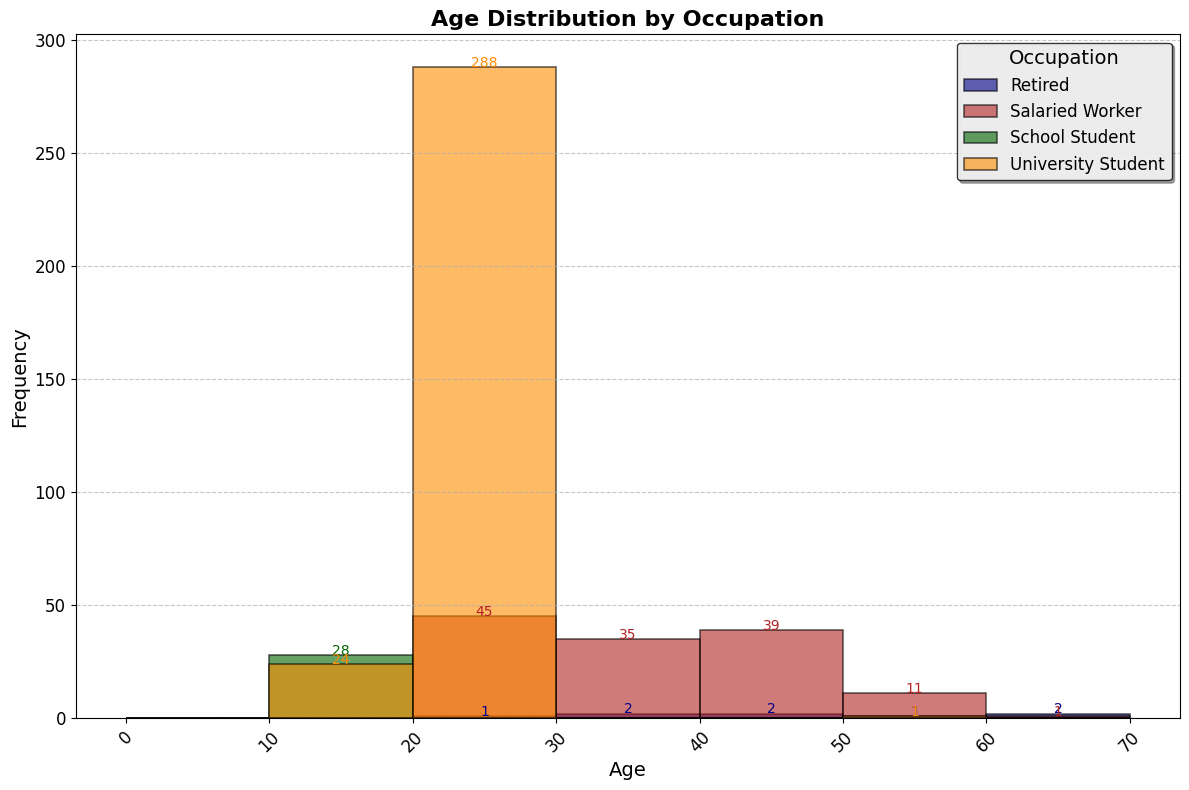

In [ ]:
# Assuming 'data' is your DataFrame containing 'Age' and 'Occupation' columns

# Assign custom colors for each occupation
colors = {
    'Retired': 'darkblue',
    'University Student': 'darkorange',
    'School Student': 'darkgreen',
    'Salaried Worker': 'firebrick',
}

# Group ages by occupation
grouped_ages = data.groupby('Occupation')['Age']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting histograms 'Age Distribution by Occupation'
bin_edges = np.arange(0, data['Age'].max()+10, 10)
for occupation, ages in grouped_ages:
    ax.hist(ages, bins=bin_edges, alpha=0.6, label=occupation, color=colors.get(occupation, 'gray'), edgecolor='black', linewidth=1.2)

# Customize the plot
ax.set_title('Age Distribution by Occupation', fontsize=16, fontweight='bold')
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xticks(bin_edges)
ax.set_xticklabels(bin_edges, rotation=45, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
legend = ax.legend(title='Occupation', title_fontsize=14, fontsize=12, loc='upper right', shadow=True, facecolor='white', framealpha=0.8)
legend.get_frame().set_edgecolor('black')

# Add data labels for each occupation
for occupation, ages in grouped_ages:
    heights, _ = np.histogram(ages, bins=bin_edges)
    for i, height in enumerate(heights):
        if height > 0:
            ax.text(bin_edges[i]+5, height+0.1, str(height), fontsize=10, color=colors.get(occupation, 'gray'), ha='center')

fig.tight_layout()
plt.show()


Age Distribution

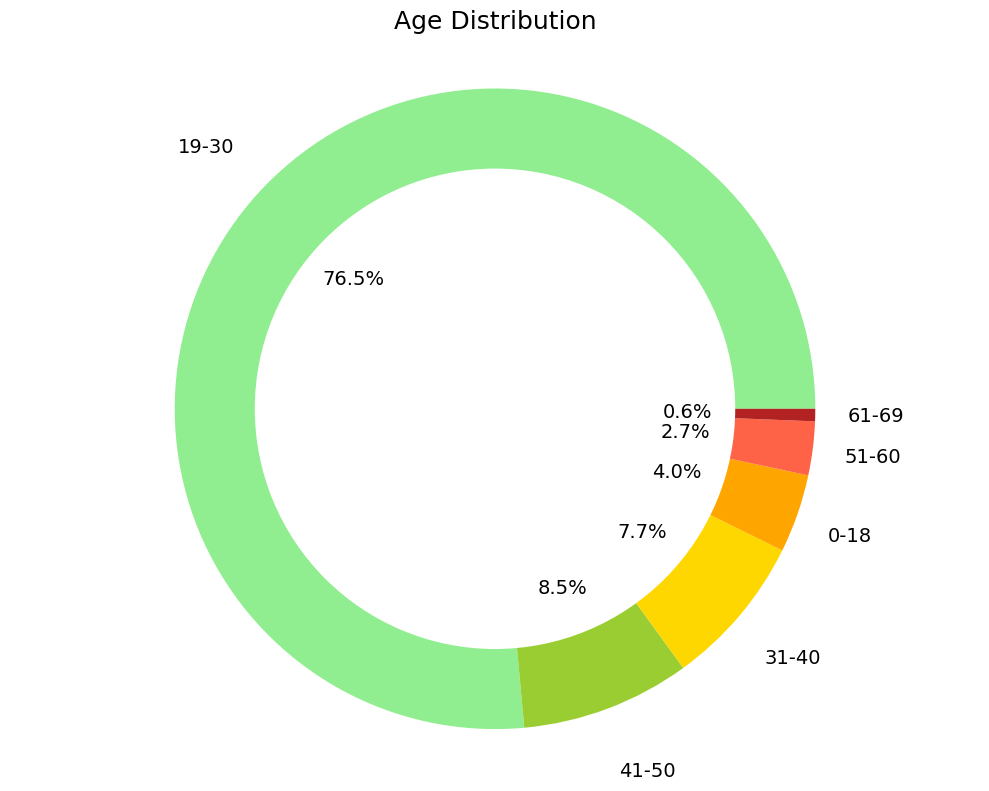

In [ ]:
# Define age bins
bins = [0, 18, 30, 40, 50, 60, 70]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-69']

# Assign age groups based on bins
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate the count of each age group
age_group_counts = data['Age Group'].value_counts()

# Define custom colors for each age group
colors = ['lightgreen', 'yellowgreen', 'gold', 'orange', 'tomato', 'firebrick']

# Plotting pie chart for age distribution
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 14})

# Adjust the position of the labels
for text in texts:
    text.set_position((text.get_position()[0], text.get_position()[1] * 1.1))

# Add a circle to separate the pie chart from the labels
centre_circle = plt.Circle((0, 0), 0.75, fc='white')
fig.gca().add_artist(centre_circle)

# Add a title and adjust the layout
ax.set_title('Age Distribution', fontsize=18, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()

plt.show()


Gender Frequency

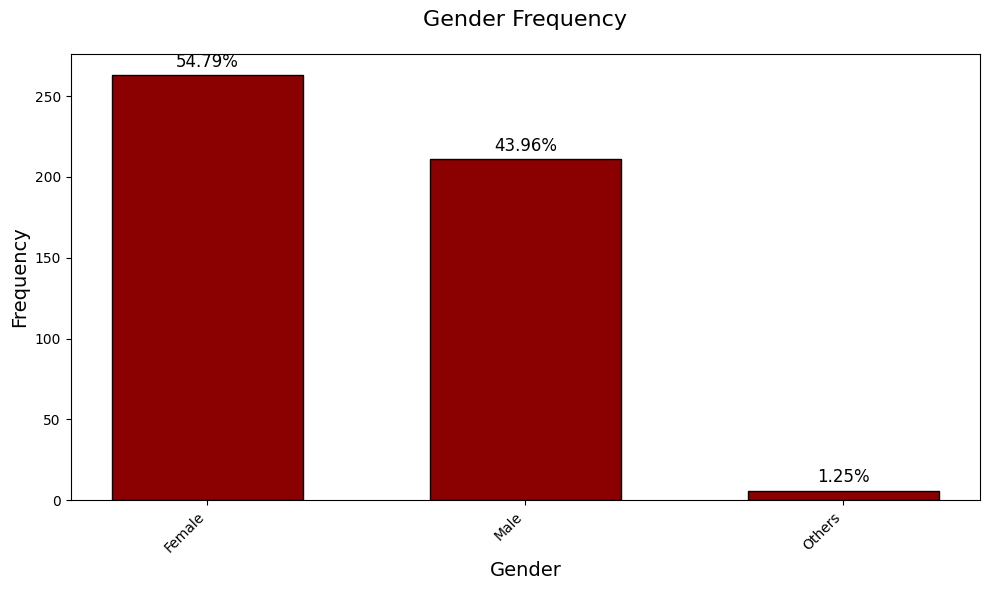

In [ ]:
# Calculate frequencies of each value in 'Gender' column
frequency_table = data['Gender'].value_counts().reset_index()
frequency_table.columns = ['Gender', 'Frequency']

# Calculate percentages
total_count = len(data)
frequency_table['Percentage'] = (frequency_table['Frequency'] / total_count) * 100

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
bar_width = 0.6
bars = ax.bar(np.arange(len(frequency_table['Gender'])), frequency_table['Frequency'], width=bar_width, edgecolor='k', color='darkred')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, frequency_table['Percentage']):
    height = bar.get_height()
    ax.annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar_width / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12)

# Set x-axis tick labels
ax.set_xticks(np.arange(len(frequency_table['Gender'])))
ax.set_xticklabels(frequency_table['Gender'], rotation=45, ha='right')

# Add titles and labels
ax.set_title('Gender Frequency', fontsize=16, pad=20)
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

Relationship Status Frequency

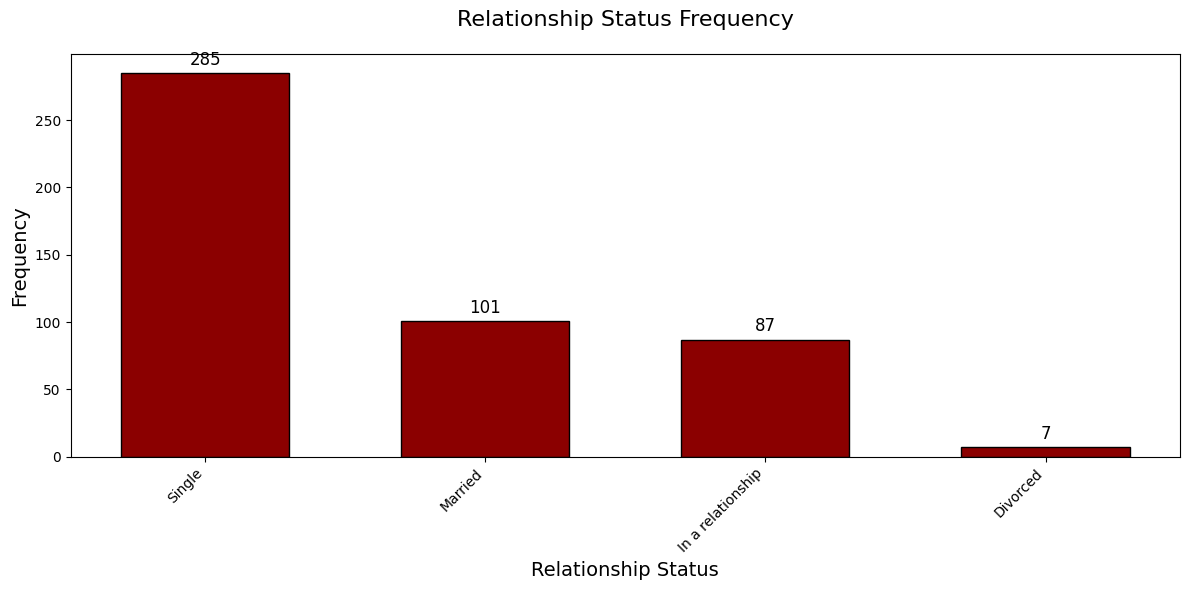

In [ ]:
# Calculate frequencies of each value in 'Relationship Status' column
frequency_table = data['Relationship Status'].value_counts().reset_index()
frequency_table.columns = ['Relationship Status', 'Frequency']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot
bar_width = 0.6
bar_positions = np.arange(len(frequency_table['Relationship Status']))
bars = ax.bar(bar_positions, frequency_table['Frequency'], width=bar_width, edgecolor='k', color='darkred')

# Add frequency labels on top of each bar
for bar, frequency in zip(bars, frequency_table['Frequency']):
    height = bar.get_height()
    ax.annotate(f'{frequency}', xy=(bar.get_x() + bar_width / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12)

# Set x-axis tick labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(frequency_table['Relationship Status'], rotation=45, ha='right')

# Add titles and labels
ax.set_title('Relationship Status Frequency', fontsize=16, pad=20)
ax.set_xlabel('Relationship Status', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

Occupation Frequency

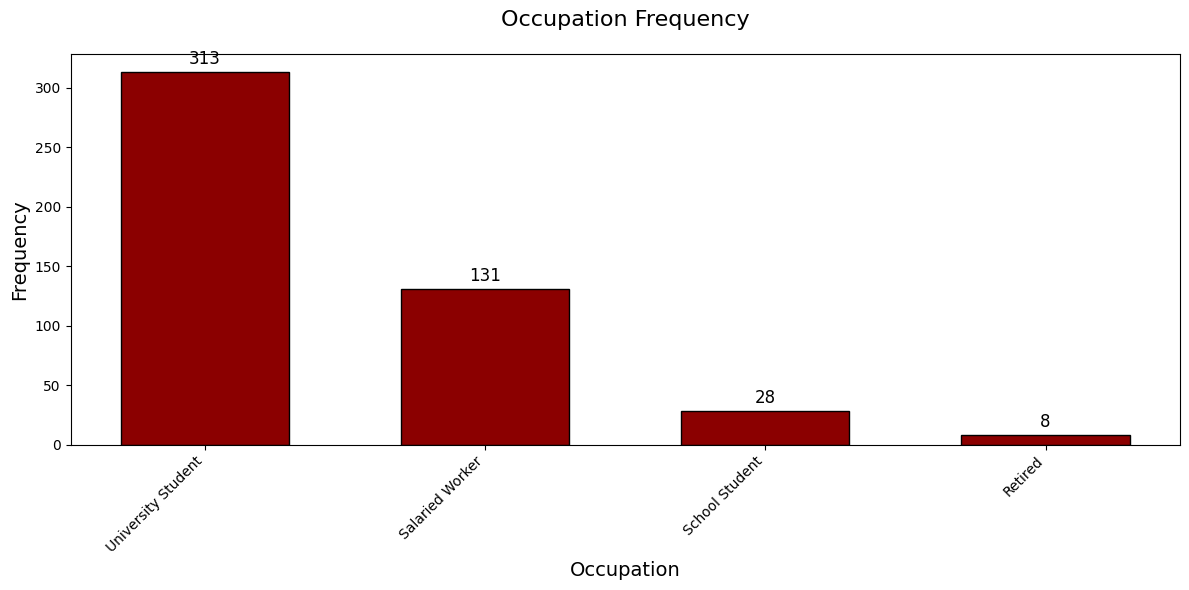

In [ ]:
# Calculate frequencies of each value in 'Occupation' column
frequency_table = data['Occupation'].value_counts().reset_index()
frequency_table.columns = ['Occupation', 'Frequency']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot
bar_width = 0.6
bar_positions = np.arange(len(frequency_table['Occupation']))
bars = ax.bar(bar_positions, frequency_table['Frequency'], width=bar_width, edgecolor='k', color='darkred')

# Add frequency labels on top of each bar
for bar, frequency in zip(bars, frequency_table['Frequency']):
    height = bar.get_height()
    ax.annotate(f'{frequency}', xy=(bar.get_x() + bar_width / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12)

# Set x-axis tick labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(frequency_table['Occupation'], rotation=45, ha='right')

# Add titles and labels
ax.set_title('Occupation Frequency', fontsize=16, pad=20)
ax.set_xlabel('Occupation', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

Hours per Day vs ADHD Score

In [ ]:
# Calculate mean and standard deviation for each bin
summary_stats = data.groupby('Time Spent per Day')['ADHD Score'].agg(['mean', 'std'])

# Display summary statistics
print(summary_stats)

                            mean       std
Time Spent per Day                        
Between 1 and 2 hours  11.357143  3.439058
Between 2 and 3 hours  13.336634  3.595211
Between 3 and 4 hours  14.118280  3.444749
Between 4 and 5 hours  14.597015  3.459986
Less than an Hour       8.058824  3.054467
More than 5 hours      15.252174  3.219577


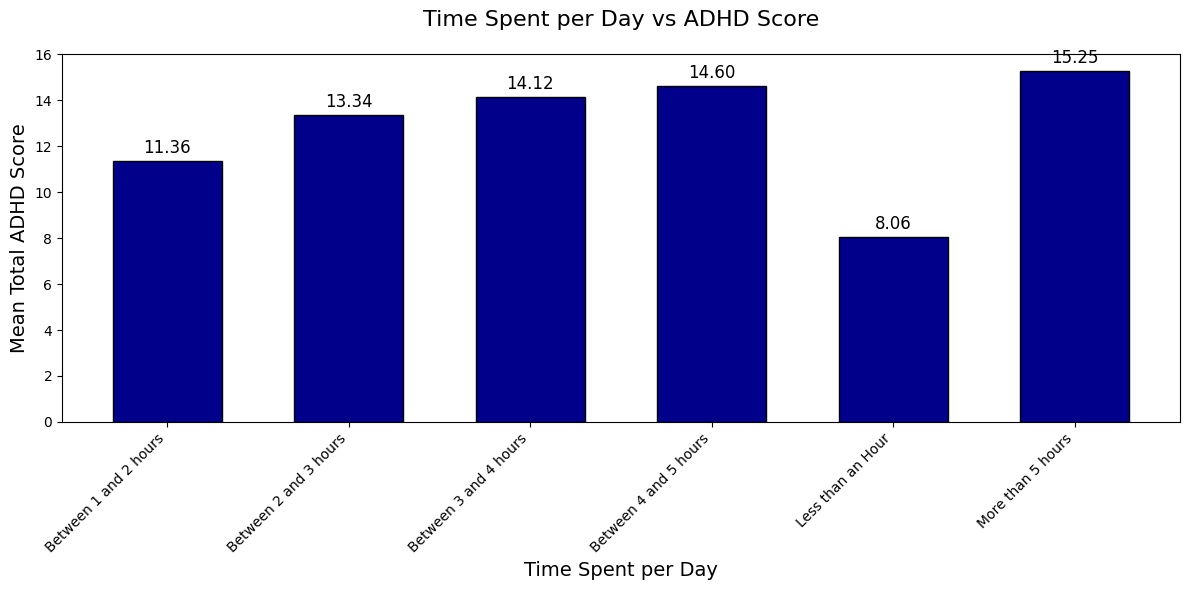

In [ ]:
# Calculate mean and standard deviation for each bin
summary_stats = data.groupby('Time Spent per Day')['ADHD Score'].agg(['mean'])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean total score as a bar plot
bar_width = 0.6
bar_positions = np.arange(len(summary_stats.index))
bars = ax.bar(bar_positions, summary_stats['mean'], width=bar_width, color='darkblue', edgecolor='black')

# Add mean values on top of each bar
for bar, mean_value in zip(bars, summary_stats['mean']):
    height = bar.get_height()
    ax.annotate(f'{mean_value:.2f}', xy=(bar.get_x() + bar_width / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12)

# Set x-axis tick labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(summary_stats.index, rotation=45, ha='right')

# Add labels and title
ax.set_xlabel('Time Spent per Day', fontsize=14)
ax.set_ylabel('Mean Total ADHD Score', fontsize=14)
ax.set_title('Time Spent per Day vs ADHD Score', fontsize=16, pad=20)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Relationship between Age and ADHD Score

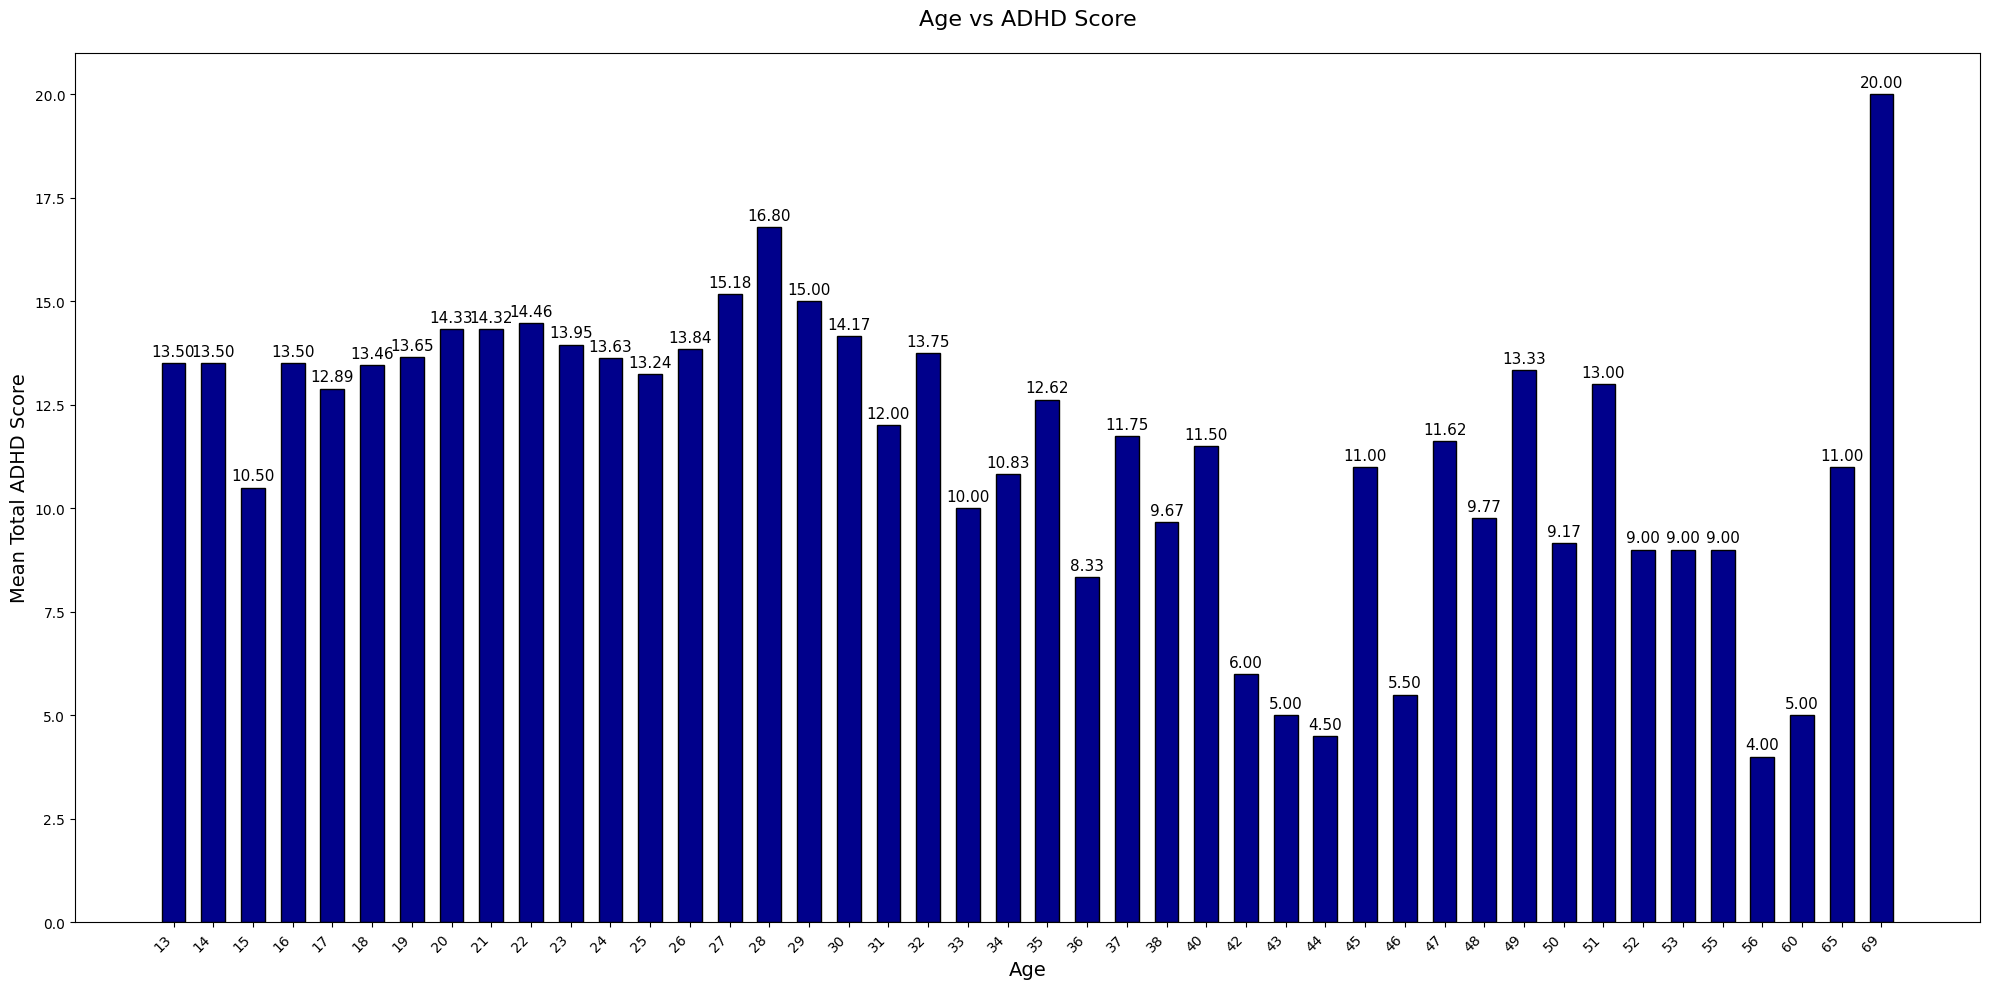

In [ ]:
# Calculate mean and standard deviation for each bin
summary_stats = data.groupby('Age')['ADHD Score'].agg(['mean'])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Plot mean total score as a bar plot
bar_width = 0.6
bar_positions = np.arange(len(summary_stats.index))
bars = ax.bar(bar_positions, summary_stats['mean'], width=bar_width, color='darkblue', edgecolor='black')

# Add mean values on top of each bar
for bar, mean_value in zip(bars, summary_stats['mean']):
    height = bar.get_height()
    ax.annotate(f'{mean_value:.2f}', xy=(bar.get_x() + bar_width / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=11)

# Set x-axis tick labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(summary_stats.index, rotation=45, ha='right')

# Add labels and title
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Mean Total ADHD Score', fontsize=14)
ax.set_title('Age vs ADHD Score', fontsize=16, pad=20)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Relationship between Age and ADHD Score

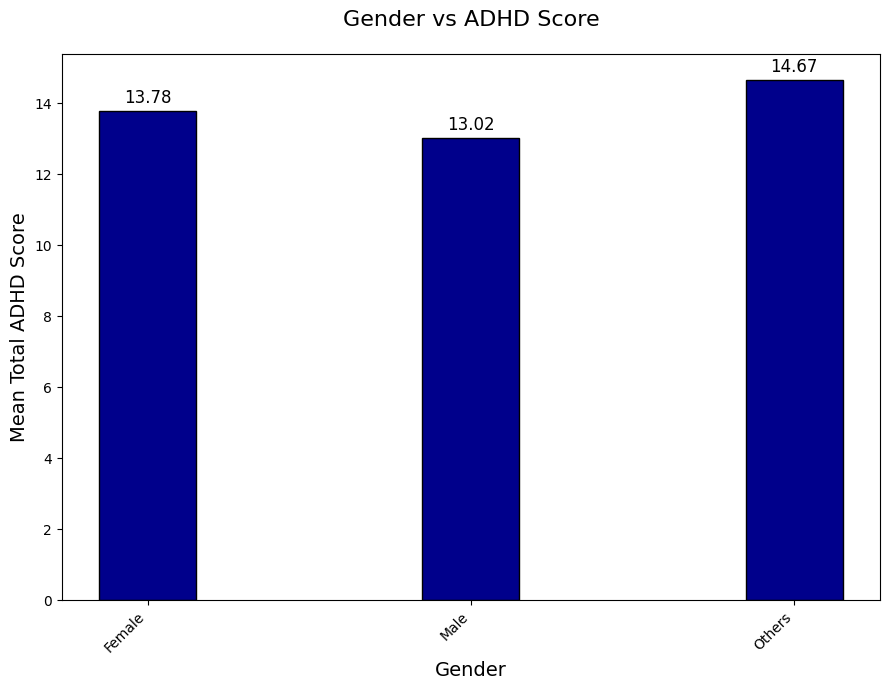

In [ ]:
# Calculate mean and standard deviation for each bin
summary_stats = data.groupby('Gender')['ADHD Score'].agg(['mean'])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(9, 7))

# Plot mean total score as a bar plot
bar_width = 0.3
bar_positions = np.arange(len(summary_stats.index))
bars = ax.bar(bar_positions, summary_stats['mean'], width=bar_width, color='darkblue', edgecolor='black')

# Add mean values on top of each bar
for bar, mean_value in zip(bars, summary_stats['mean']):
    height = bar.get_height()
    ax.annotate(f'{mean_value:.2f}', xy=(bar.get_x() + bar_width / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12)

# Set x-axis tick labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(summary_stats.index, rotation=45, ha='right')

# Add labels and title
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Mean Total ADHD Score', fontsize=14)
ax.set_title('Gender vs ADHD Score', fontsize=16, pad=20)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Converting Objects to Numerical Values

In [ ]:
# Converting 'Time Spent per Day' to numerical values
# Less than an Hour -> 0
# Between 1 and 2 hours -> 1
# Between 2 and 3 hours -> 2
# Between 3 and 4 hours -> 3
# Between 4 and 5 hours -> 4
# More than 5 hours -> 5
data.loc[data['Time Spent per Day'] == 'Less than an Hour', 'Time Spent per Day'] = 0
data.loc[data['Time Spent per Day'] == 'Between 1 and 2 hours', 'Time Spent per Day'] = 1
data.loc[data['Time Spent per Day'] == 'Between 2 and 3 hours', 'Time Spent per Day'] = 2
data.loc[data['Time Spent per Day'] == 'Between 3 and 4 hours', 'Time Spent per Day'] = 3
data.loc[data['Time Spent per Day'] == 'Between 4 and 5 hours', 'Time Spent per Day'] = 4
data.loc[data['Time Spent per Day'] == 'More than 5 hours', 'Time Spent per Day'] = 5

In [ ]:
# Converting 'Time Spent per Day' from object type to int64.
data['Time Spent per Day'] = data['Time Spent per Day'].astype('int64')

In [ ]:
# Converting 'Gender' to numerical values
# Male -> 0
# Female -> 1
# Others -> 2
data.loc[data['Gender'] == 'Male', 'Gender'] = 0
data.loc[data['Gender'] == 'Female', 'Gender'] = 1
data.loc[data['Gender'] == 'Others', 'Gender'] = 2

In [ ]:
# Converting 'Gender' from object type to int64.
data['Gender'] = data['Gender'].astype('int64')

In [ ]:
# Show the data
data.head(5)

,Age,Gender,Relationship Status,Occupation,Social Media User?,Time Spent per Day,Platforms,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,ADHD Outcome,Age Group
0,21,0,In a relationship,University Student,Yes,2,"Social Networks, Media Sharing Networks, Discu...",18,4,7,14,43,1,19-30
1,21,1,Single,University Student,Yes,5,"Social Networks, Media Sharing Networks, Discu...",15,7,7,14,43,1,19-30
2,21,1,Single,University Student,Yes,3,"Social Networks, Media Sharing Networks",11,6,7,11,35,0,19-30
3,21,1,Single,University Student,Yes,5,"Social Networks, Media Sharing Networks",12,6,8,9,35,1,19-30
4,21,1,Single,University Student,Yes,2,"Social Networks, Media Sharing Networks",17,9,9,9,44,1,19-30


Correlation Plot

In [ ]:
data.corr(numeric_only=True)

,Age,Gender,Time Spent per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,ADHD Outcome
Age,1.000000,-0.154394,-0.369405,-0.325643,-0.287309,-0.111693,-0.345845,-0.348886,-0.298178
Gender,-0.154394,1.000000,0.215704,0.102384,0.150707,0.091727,0.102340,0.134821,0.094665
Time Spent per Day,-0.369405,0.215704,1.000000,0.453670,0.443020,0.198175,0.346333,0.459921,0.367018
ADHD Score,-0.325643,0.102384,0.453670,1.000000,0.676207,0.376763,0.621464,0.882562,0.803384
Anxiety Score,-0.287309,0.150707,0.443020,0.676207,1.000000,0.421492,0.580797,0.815189,0.537199
Self Esteem Score,-0.111693,0.091727,0.198175,0.376763,0.421492,1.000000,0.418137,0.637863,0.347614
Depression Score,-0.345845,0.102340,0.346333,0.621464,0.580797,0.418137,1.000000,0.837725,0.475276
Total Score,-0.348886,0.134821,0.459921,0.882562,0.815189,0.637863,0.837725,1.000000,0.710212
ADHD Outcome,-0.298178,0.094665,0.367018,0.803384,0.537199,0.347614,0.475276,0.710212,1.000000


Kernal Density Plot (Diagonal)

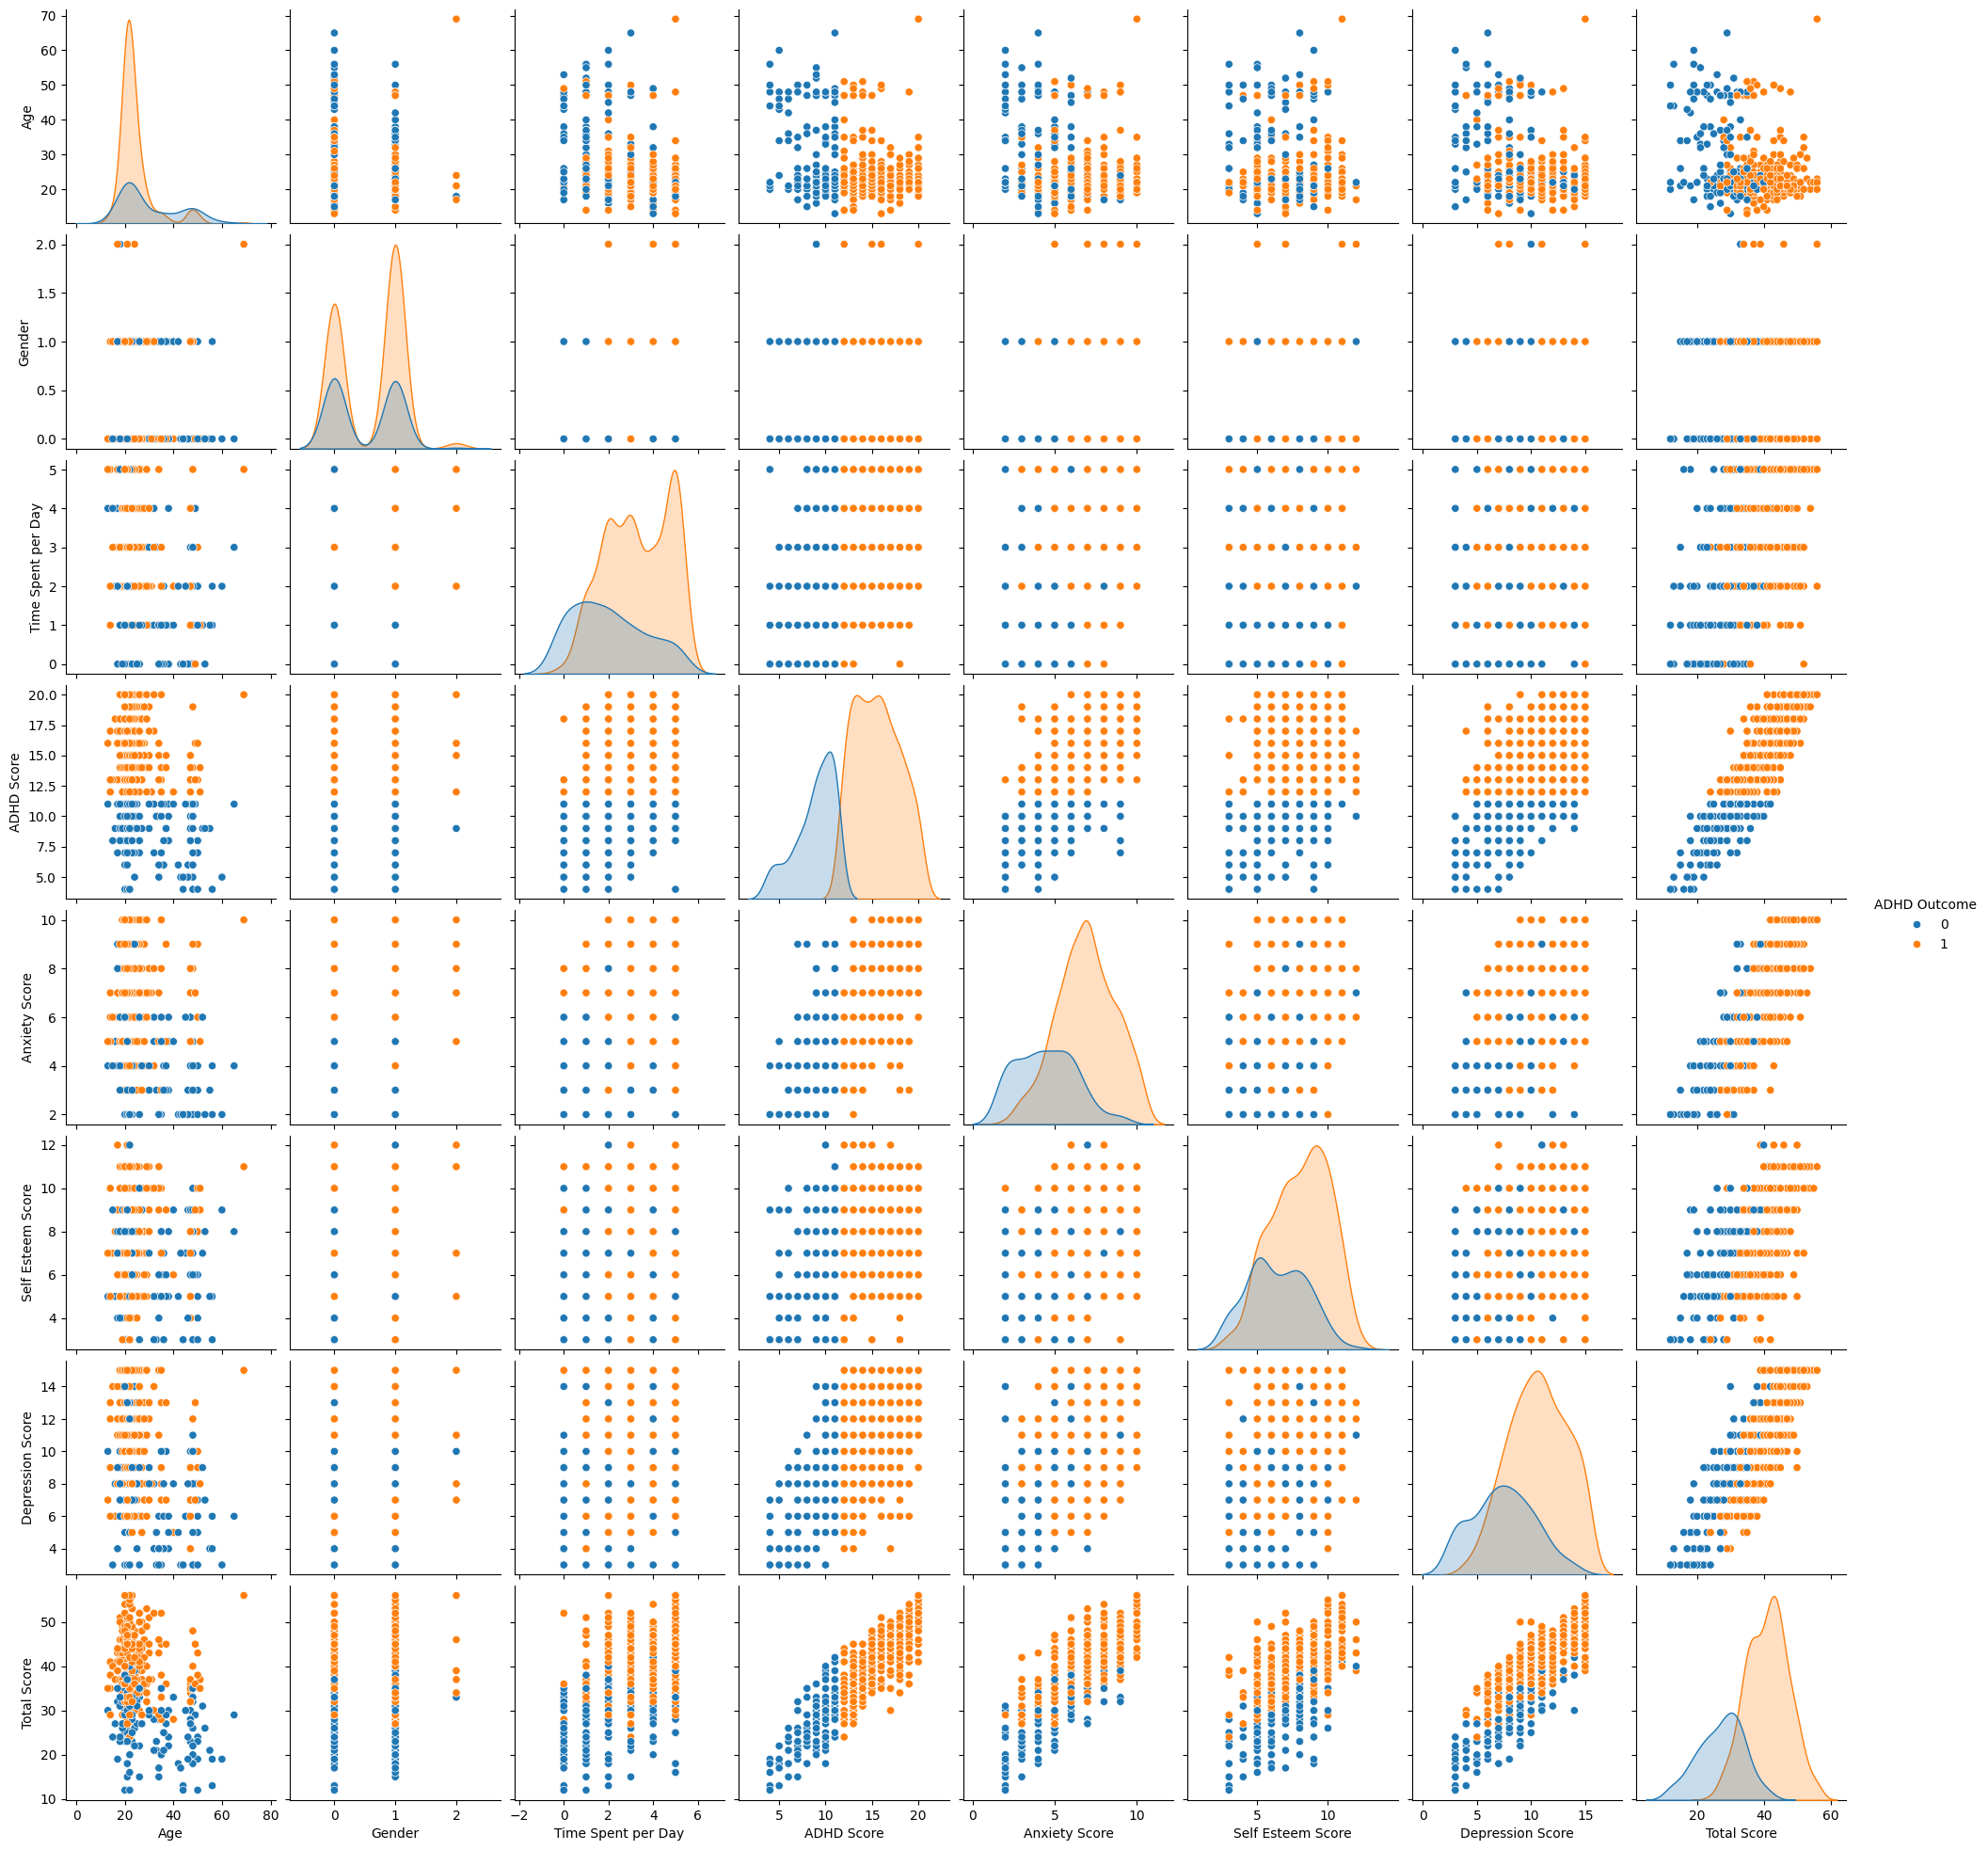

In [ ]:
sns.pairplot(data,hue='ADHD Outcome',diag_kind='kde')

Correlation Table and Heatmap

Text(0.5, 1.0, 'Correlation Table and Heatmap')

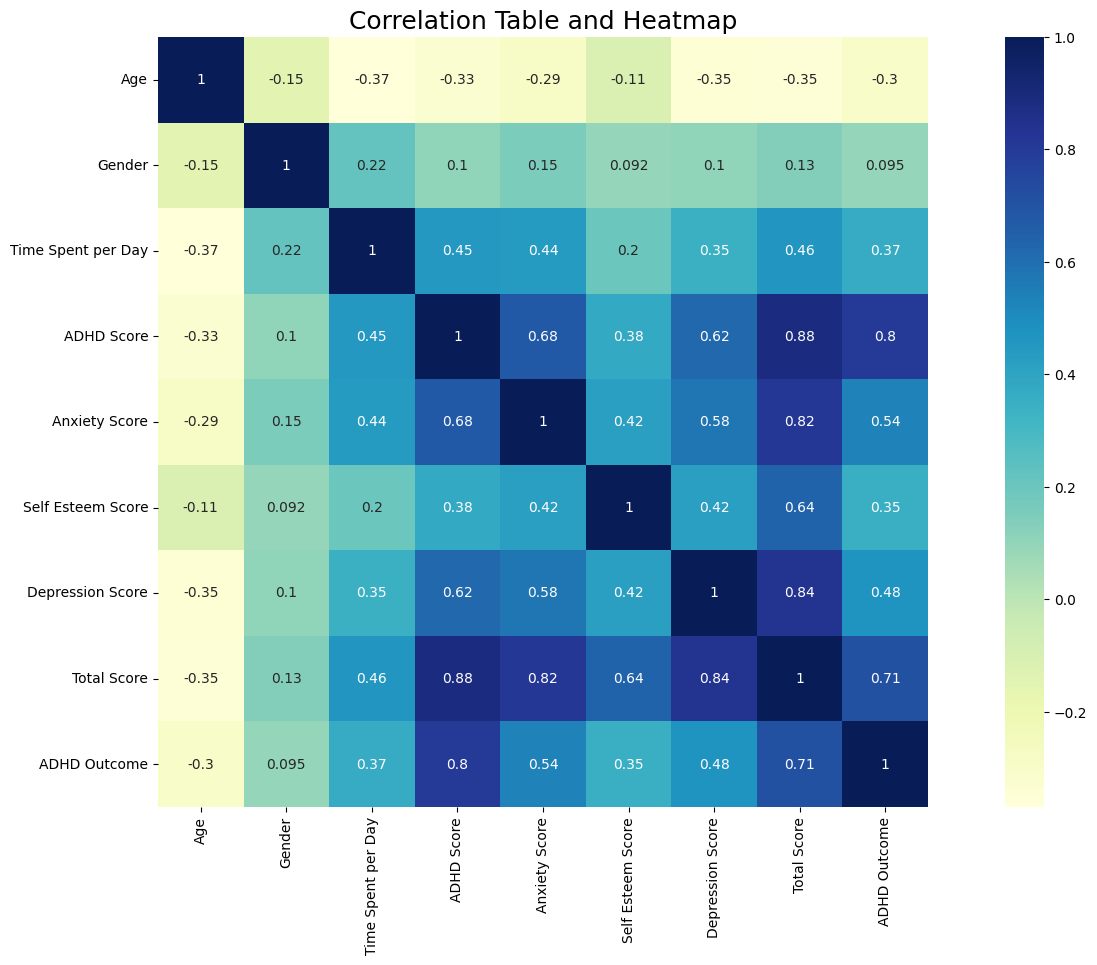

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr("pearson", numeric_only=True)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap="YlGnBu", square=True, ax=ax, annot=True)
ax.set_title("Correlation Table and Heatmap", fontsize=18)

# Predictive Modelling Using Classifier

Preprocessing

In [ ]:
# Dropping columns that are irrelevant and potentially could give a bad impact to our prediction
to_drop = ['Relationship Status',
          'Occupation',
          'Social Media User?',
          'Platforms',
          'Age Group',
          'ADHD Score',
          'Anxiety Score',
          'Self Esteem Score',
          'Depression Score',
          'Total Score']

data.drop(to_drop, inplace=True, axis=1)

In [ ]:
# Showing the new dataset that will be used for machine learning process
pd.set_option('display.max_rows', None)
print(data)

     Age  Gender  Time Spent per Day  ADHD Outcome
0     21       0                   2             1
1     21       1                   5             1
2     21       1                   3             0
3     21       1                   5             1
4     21       1                   2             1
5     22       1                   2             1
6     21       1                   3             1
7     21       1                   5             0
8     21       1                   5             0
9     20       0                   0             0
10    24       0                   2             1
11    21       1                   3             1
12    22       1                   3             1
13    21       1                   3             1
14    22       0                   5             1
15    23       0                   1             1
16    21       0                   0             0
17    25       0                   4             1
18    28       0               

Split Up Dataset (80% for Training and 20% for Testing)

In [ ]:
# Importing necessary libraries for dataset split
from sklearn.model_selection import train_test_split

In [ ]:
# Split up dataset
X = data.drop(['ADHD Outcome'], axis = 1)
y = data['ADHD Outcome']

# Split the data into training and temporary sets (80% - 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% - 50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)  # Training set
print(X_val.shape, y_val.shape)      # Validation set
print(X_test.shape, y_test.shape)    # Test set

(384, 3) (384,)
(48, 3) (48,)
(48, 3) (48,)


Target Class Data Visualization

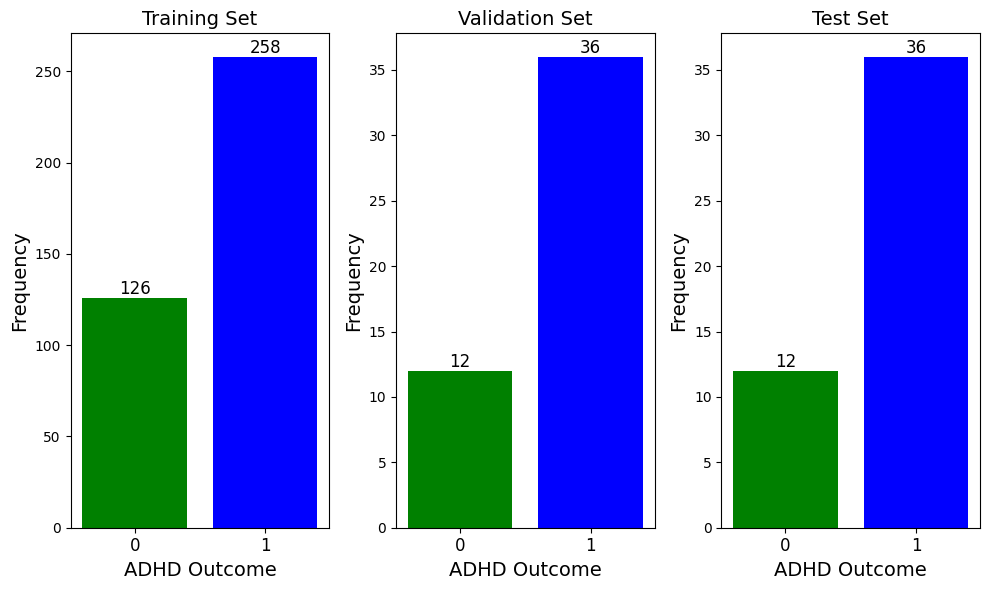

In [ ]:
def plot_adhd_outcome(data, title, ax):
    # Count the occurrences of each category
    counts = data.value_counts()

    # Create a bar plot
    bars = ax.bar(counts.index, counts.values, color=['blue', 'green'])

    # Add text annotations on the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, int(height),
                va='bottom', ha='center', fontsize=12)

    # Set labels and title
    ax.set_xlabel('ADHD Outcome', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['0', '1'], fontsize=12)

fig, axs = plt.subplots(1, 3, figsize=(10, 6))  # Create a figure with three subplots

# Plot for each dataset
plot_adhd_outcome(y_train, 'Training Set', axs[0])
plot_adhd_outcome(y_val, 'Validation Set', axs[1])
plot_adhd_outcome(y_test, 'Test Set', axs[2])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


### Logistic Regression

Library Import

In [ ]:
# Importing necessary libraries for logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
!pip install scikit-plot

Create Model

In [ ]:
# Create logistic regression model
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)

Logistic Regression Model Training Using The Training Dataset

In [ ]:
# Call logistic regression model to be trained
LR_model.fit(X_train, y_train)

# Classification report
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']
print('Training Classification Report for Logistic Regression Model:\n',
      classification_report(y_train, LR_model.predict(X_train), target_names=target_names, digits=6))

Training Classification Report for Logistic Regression Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.687500  0.436508  0.533981       126
   ADHD Symptoms   0.766447  0.903101  0.829181       258

        accuracy                       0.750000       384
       macro avg   0.726974  0.669804  0.681581       384
    weighted avg   0.740543  0.750000  0.732319       384



Logistic Regression Model Evaluation Using The Validation Dataset

In [ ]:
# Classification report
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']
print('Evaluation Classification Report for Logistic Regression Model:\n',
      classification_report(y_val, LR_model.predict(X_val), target_names=target_names, digits=6))

Evaluation Classification Report for Logistic Regression Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.615385  0.666667  0.640000        12
   ADHD Symptoms   0.885714  0.861111  0.873239        36

        accuracy                       0.812500        48
       macro avg   0.750549  0.763889  0.756620        48
    weighted avg   0.818132  0.812500  0.814930        48



Logistic Regression Model Predict The Test Dataset

In [ ]:
# Predict the test dataset using trained logistic regression model
LR_predicted = LR_model.predict(X_test)

In [ ]:
# Call for test accuracy score
LR_test_accuracy = LR_model.score(X_test, y_test)

Confusion Matrix

[[ 5  7]
 [ 3 33]]


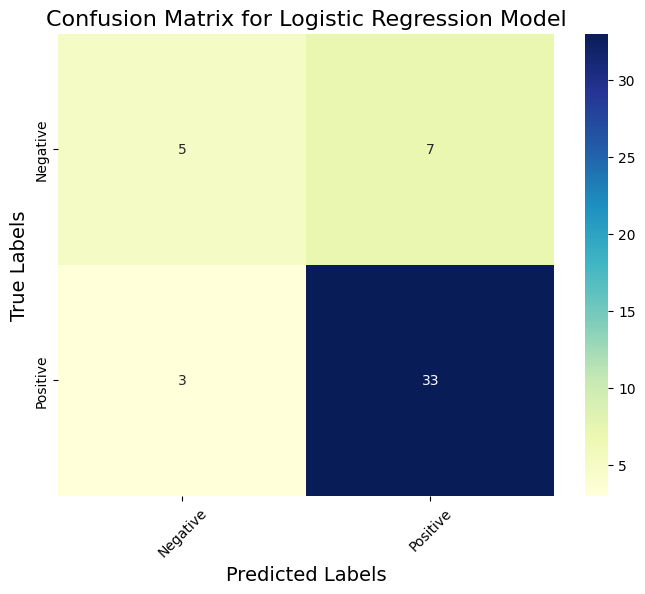

In [ ]:
# Call for confusion matrix
from sklearn import metrics
LR_cm = metrics.confusion_matrix(y_test, LR_predicted)
print(LR_cm)

# Plot the confusion matrix
import scikitplot as skplt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix using Seaborn's heatmap
sns.heatmap(LR_cm, annot=True, cmap="YlGnBu", fmt='g', ax=ax)

# Add labels and title
ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('True Labels', fontsize=14)
ax.set_title('Confusion Matrix for Logistic Regression Model', fontsize=16)

# Adjust tick labels and rotation
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.xticks(rotation=45)

# Display the plot
plt.show()

Predicted Values

In [ ]:
# Show logistic regression model classified values
print("Predicted Values using Logistic Regression Model: ", LR_predicted)

Predicted Values using Logistic Regression Model:  [1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0]


Logistic Regression Model Accuracy

In [ ]:
# Show logistic regression model accuracy
# How often is the classifier correct?
print('Logistic Regression Model Test Accuracy Score: ', LR_test_accuracy)

Logistic Regression Model Test Accuracy Score:  0.7916666666666666


Logistic Regression Model Precision Score

In [ ]:
# Precision measures the ability of a model to correctly identify only the relevant positive instances.
#  It is calculated as:
# Precision = True Positives / (True Positives + False Positives)
# A high precision indicates that-
# the model is good at identifying true positives while minimizing false positives (negative cases misclassified as positive).

# Show logistic regression model precision score
print("Logistic Regression Model Precision Score:", metrics.precision_score(y_test, LR_predicted))

Logistic Regression Model Precision Score: 0.825


Logistic Regression Model Recall Score

In [ ]:
# Recall measures the ability of a model to correctly identify all positive instances or examples.
# It is calculated as:
# Recall = True Positives / (True Positives + False Negatives)
# A high recall indicates that the model is good at detecting most of the positive cases,
# minimizing the number of false negatives (positive cases misclassified as negative).

# Show logistic regression model recall score
print("Logistic Regression Model Recall Score:", metrics.recall_score(y_test, LR_predicted))

Logistic Regression Model Recall Score: 0.9166666666666666


Logistic Regression Model F1 Score

In [ ]:
from sklearn.metrics import f1_score
print("Logistic Regression Model F1 Score:", f1_score(y_test, LR_predicted))

Logistic Regression Model F1 Score: 0.8684210526315789


Logistic Regression Classification Report

In [ ]:
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']

print('Test Classification Report for Logistic Regression Model:\n',
       classification_report(y_test, LR_predicted, target_names=target_names, digits=6))

Test Classification Report for Logistic Regression Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.625000  0.416667  0.500000        12
   ADHD Symptoms   0.825000  0.916667  0.868421        36

        accuracy                       0.791667        48
       macro avg   0.725000  0.666667  0.684211        48
    weighted avg   0.775000  0.791667  0.776316        48



### Random Forest Classifier

Library Import

In [ ]:
# Importing necessary libraries for random forest classifier model
from sklearn.ensemble import RandomForestClassifier

Create Model

In [ ]:
# Create random forest classifier model
RF_model = RandomForestClassifier(n_estimators=400,  # Increase number of trees
                                  max_depth=None,  # Allow trees to grow deeper
                                  )

Random Forest Classifier Model Training Using The Training Dataset

In [ ]:
# Call random forest classifier model to be trained
RF_model.fit(X_train, y_train)

# Classification report
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']

print('Training Classification Report for Random Forest Model:\n',
       classification_report(y_train, RF_model.predict(X_train), target_names=target_names, digits=6))

Training Classification Report for Random Forest Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.881720  0.650794  0.748858       126
   ADHD Symptoms   0.848797  0.957364  0.899818       258

        accuracy                       0.856771       384
       macro avg   0.865259  0.804079  0.824338       384
    weighted avg   0.859600  0.856771  0.850284       384



Random Forest Classifier Model Evaluation Using The Validation Dataset

In [ ]:
# Classification report
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']

print('Evaluation Classification Report for Random Forest Model:\n',
       classification_report(y_val, RF_model.predict(X_val), target_names=target_names, digits=6))

Evaluation Classification Report for Random Forest Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.384615  0.416667  0.400000        12
   ADHD Symptoms   0.800000  0.777778  0.788732        36

        accuracy                       0.687500        48
       macro avg   0.592308  0.597222  0.594366        48
    weighted avg   0.696154  0.687500  0.691549        48



Random Forest Classifier Model Predict The Test Dataset

In [ ]:
# Predict the test dataset using trained random forest classifier model
RF_predicted = RF_model.predict(X_test)

In [ ]:
# Call for test accuracy score
RF_test_accuracy = RF_model.score(X_test, y_test)

Confusion Matrix

[[ 3  9]
 [ 7 29]]


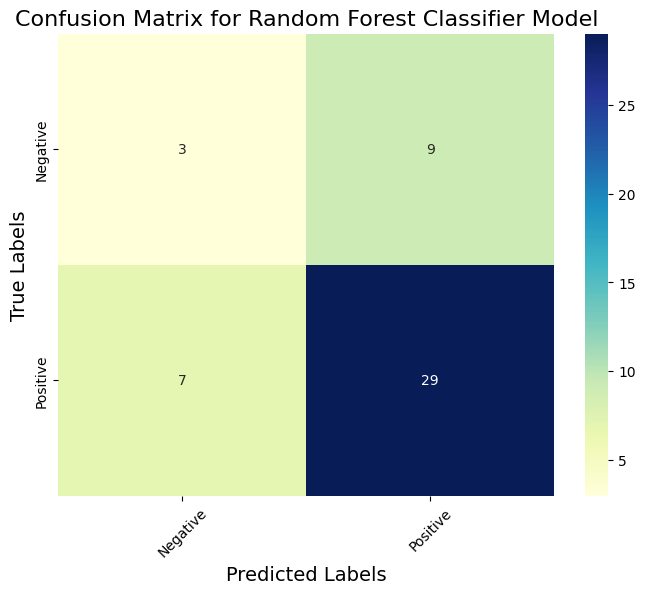

In [ ]:
# Call for confusion matrix
from sklearn import metrics
RF_cm = metrics.confusion_matrix(y_test, RF_predicted)
print(RF_cm)

# Plot the confusion matrix
import scikitplot as skplt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix using Seaborn's heatmap
sns.heatmap(RF_cm, annot=True, cmap="YlGnBu", fmt='g', ax=ax)

# Add labels and title
ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('True Labels', fontsize=14)
ax.set_title('Confusion Matrix for Random Forest Classifier Model', fontsize=16)

# Adjust tick labels and rotation
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.xticks(rotation=45)

# Display the plot
plt.show()

Predicted Values

In [ ]:
# Show random forest classifier model classified values
print("Predicted Values using Random Forest Classifier Model: ", RF_predicted)

Predicted Values using Random Forest Classifier Model:  [1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0]


Random Forest Model Classifier Model Accuracy

In [ ]:
# Show random forest classifier model accuracy
# How often is the classifier correct?
print('Random Forest Classifier Model Test Accuracy Score: ', RF_test_accuracy)

Random Forest Classifier Model Test Accuracy Score:  0.6666666666666666


Random Forest Model Classifier Model Precision Score

In [ ]:
# Precision measures the ability of a model to correctly identify only the relevant positive instances.
#  It is calculated as:
# Precision = True Positives / (True Positives + False Positives)
# A high precision indicates that-
# the model is good at identifying true positives while minimizing false positives (negative cases misclassified as positive).

# Show random forest classifier model precision score
print("Random Forest Classifier Model Precision Score:", metrics.precision_score(y_test, RF_predicted))

Random Forest Classifier Model Precision Score: 0.7631578947368421


Random Forest Model Classifier Model Recall Score

In [ ]:
# Recall measures the ability of a model to correctly identify all positive instances or examples.
# It is calculated as:
# Recall = True Positives / (True Positives + False Negatives)
# A high recall indicates that the model is good at detecting most of the positive cases,
# minimizing the number of false negatives (positive cases misclassified as negative).

# Show  random forest classifier model recall score
print("Random Forest Classifier Model Recall Score:", metrics.recall_score(y_test, RF_predicted))

Random Forest Classifier Model Recall Score: 0.8055555555555556


Random Forest Classifier Model F1 Score

In [ ]:
from sklearn.metrics import f1_score
print("Random Forest Classifier Model F1 Score:", f1_score(y_test, RF_predicted))

Random Forest Classifier Model F1 Score: 0.7837837837837838


Random Forest Model Classification Report

In [ ]:
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']

print('Test Classification Report for Random Forest Model:\n',
       classification_report(y_test, RF_predicted, target_names=target_names, digits=6))

Test Classification Report for Random Forest Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.300000  0.250000  0.272727        12
   ADHD Symptoms   0.763158  0.805556  0.783784        36

        accuracy                       0.666667        48
       macro avg   0.531579  0.527778  0.528256        48
    weighted avg   0.647368  0.666667  0.656020        48



### Gaussian Naive Bayes

Library Import

In [ ]:
# Importing necessary libraries for gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

Create Model

In [ ]:
# Create gaussian naive bayes model
NB_model = GaussianNB()

Gaussian Naive Bayes Model Training Using The Training Dataset

In [ ]:
# Call gaussian naive bayes model to be trained
NB_model.fit(X_train, y_train)

# Classification report
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']

print('Training Classification Report for Gaussian Naive Bayes Model:\n',
       classification_report(y_train, NB_model.predict(X_train), target_names=target_names, digits=6))

Training Classification Report for Gaussian Naive Bayes Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.640449  0.452381  0.530233       126
   ADHD Symptoms   0.766102  0.875969  0.817360       258

        accuracy                       0.736979       384
       macro avg   0.703276  0.664175  0.673796       384
    weighted avg   0.724872  0.736979  0.723146       384



Gaussian Naive Bayes Model Evaluation Using The Validation Dataset

In [ ]:
# Classification report
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']

print('Evaluation Classification Report for Gaussian Naive Bayes Model:\n',
       classification_report(y_val, NB_model.predict(X_val), target_names=target_names, digits=6))

Evaluation Classification Report for Gaussian Naive Bayes Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.538462  0.583333  0.560000        12
   ADHD Symptoms   0.857143  0.833333  0.845070        36

        accuracy                       0.770833        48
       macro avg   0.697802  0.708333  0.702535        48
    weighted avg   0.777473  0.770833  0.773803        48



Gaussian Naive Bayes Model Predict The Test Dataset

In [ ]:
# Predict the test dataset using trained gaussian naive bayes model
NB_predicted = NB_model.predict(X_test)

In [ ]:
# Call for test accuracy score
NB_test_accuracy = NB_model.score(X_test, y_test)

Confusion Matrix

[[ 6  6]
 [ 5 31]]


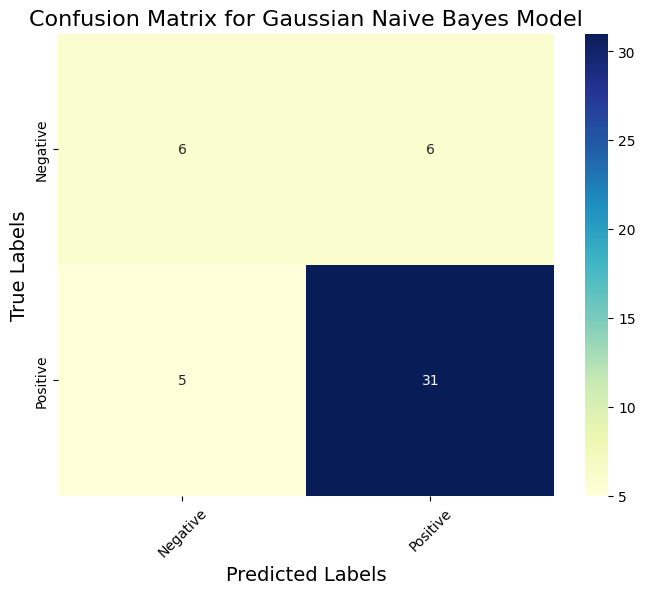

In [ ]:
# Call for confusion matrix
NB_cm = metrics.confusion_matrix(y_test, NB_predicted)
print(NB_cm)

# Plot the confusion matrix
import scikitplot as skplt

# skplt.metrics.plot_confusion_matrix(y_test, LRpredicted, normalize=False, title = 'Confusion Matrix for Gaussian Naive Bayes Model')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix using Seaborn's heatmap
sns.heatmap(NB_cm, annot=True, cmap="YlGnBu", fmt='g', ax=ax)

# Add labels and title
ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('True Labels', fontsize=14)
ax.set_title('Confusion Matrix for Gaussian Naive Bayes Model', fontsize=16)

# Adjust tick labels and rotation
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.xticks(rotation=45)

# Display the plot
plt.show()

Predicted Values

In [ ]:
# Show gaussian naive bayes model classified values
print("Predicted Values using Gaussian Naive Bayes Model: ", NB_predicted)

Predicted Values using Gaussian Naive Bayes Model:  [1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 0]


Gaussian Naive Bayes Model Accuracy

In [ ]:
# Show gaussian naive bayes model accuracy
# How often is the classifier correct?
print('Gaussian Naive Bayes Model Test Accuracy Score: ', NB_test_accuracy)

Gaussian Naive Bayes Model Test Accuracy Score:  0.7708333333333334


Gaussian Naive Bayes Model Precision Score

In [ ]:
# Precision measures the ability of a model to correctly identify only the relevant positive instances.
#  It is calculated as:
# Precision = True Positives / (True Positives + False Positives)
# A high precision indicates that-
# the model is good at identifying true positives while minimizing false positives (negative cases misclassified as positive).

# Show gaussian naive bayes model precision score
print("Gaussian Naive Bayes Model Precision Score:", metrics.precision_score(y_test, NB_predicted))

Gaussian Naive Bayes Model Precision Score: 0.8378378378378378


Gaussian Naive Bayes Model Recall Score

In [ ]:
# Recall measures the ability of a model to correctly identify all positive instances or examples.
# It is calculated as:
# Recall = True Positives / (True Positives + False Negatives)
# A high recall indicates that the model is good at detecting most of the positive cases,
# minimizing the number of false negatives (positive cases misclassified as negative).

# Show gaussian naive bayes model recall score
print("Gaussian Naive Bayes Model Recall Score:", metrics.recall_score(y_test, NB_predicted))

Gaussian Naive Bayes Model Recall Score: 0.8611111111111112


Gaussian Naive Bayes Model F1 Score

In [ ]:
from sklearn.metrics import f1_score
print("Gaussian Naive Bayes Model F1 Score:", f1_score(y_test, NB_predicted))

Gaussian Naive Bayes Model F1 Score: 0.8493150684931507


Gaussian Naive Bayes Model Classification Report

In [ ]:
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']

print('Test Classification Report for Gaussian Naive Bayes Model:\n',
       classification_report(y_test, NB_predicted, target_names=target_names, digits=6))

Test Classification Report for Gaussian Naive Bayes Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.545455  0.500000  0.521739        12
   ADHD Symptoms   0.837838  0.861111  0.849315        36

        accuracy                       0.770833        48
       macro avg   0.691646  0.680556  0.685527        48
    weighted avg   0.764742  0.770833  0.767421        48



### Support Vector Machine (SVM)

Library Import

In [ ]:
# Importing necessary libraries for SVM model
from sklearn import svm

Create Model

In [ ]:
# Create SVM model
SVM_model = svm.SVC(kernel='rbf') # using RBF kernel

SVM Model Training Using The Training Dataset

In [ ]:
# Call SVM model to be trained
SVM_model.fit(X_train, y_train)

# Classification report
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']

print('Training Classification Report for SVM Model:\n',
       classification_report(y_train, SVM_model.predict(X_train), target_names=target_names, digits=6))

Training Classification Report for SVM Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.666667  0.285714  0.400000       126
   ADHD Symptoms   0.727273  0.930233  0.816327       258

        accuracy                       0.718750       384
       macro avg   0.696970  0.607973  0.608163       384
    weighted avg   0.707386  0.718750  0.679719       384



SVM Model Evaluation Using The Validation Dataset

In [ ]:
# Classification report
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']

print('Evaluation Classification Report for SVM Model:\n',
       classification_report(y_val, SVM_model.predict(X_val), target_names=target_names, digits=6))

Evaluation Classification Report for SVM Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   0.625000  0.416667  0.500000        12
   ADHD Symptoms   0.825000  0.916667  0.868421        36

        accuracy                       0.791667        48
       macro avg   0.725000  0.666667  0.684211        48
    weighted avg   0.775000  0.791667  0.776316        48



SVM Model Predict The Test Dataset

In [ ]:
# Predict the test dataset using trained SVM model
SVM_predicted = SVM_model.predict(X_test)

In [ ]:
# Call for test accuracy score
SVM_test_accuracy = SVM_model.score(X_test, y_test)

Confusion Matrix

[[ 2 10]
 [ 0 36]]


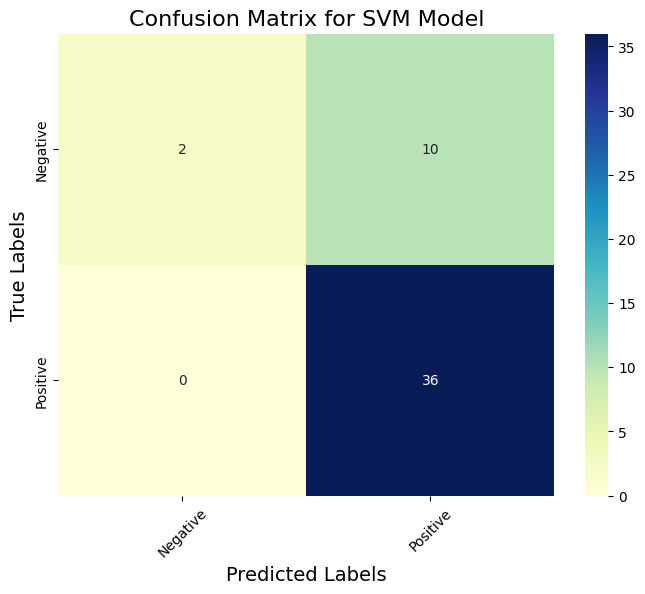

In [ ]:
# Call for confusion matrix
SVM_cm = metrics.confusion_matrix(y_test, SVM_predicted)
print(SVM_cm)

# Plot the confusion matrix
import scikitplot as skplt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix using Seaborn's heatmap
sns.heatmap(SVM_cm, annot=True, cmap="YlGnBu", fmt='g', ax=ax)

# Add labels and title
ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('True Labels', fontsize=14)
ax.set_title('Confusion Matrix for SVM Model', fontsize=16)

# Adjust tick labels and rotation
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.xticks(rotation=45)

# Display the plot
plt.show()

Predicted Values

In [ ]:
# Show SVM model classified values
print("Predicted Values using SVM Model: ", SVM_predicted)

Predicted Values using SVM Model:  [1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


SVM Model Accuracy

In [ ]:
# Show SVM model accuracy
# How often is the classifier correct?
print('SVM Model Test Accuracy Score: ', SVM_test_accuracy)

SVM Model Test Accuracy Score:  0.7916666666666666


SVM Model Precision Score

In [ ]:
# Recall measures the ability of a model to correctly identify all positive instances or examples.
# It is calculated as:
# Recall = True Positives / (True Positives + False Negatives)
# A high recall indicates that the model is good at detecting most of the positive cases,
# minimizing the number of false negatives (positive cases misclassified as negative).

# Show SVM model precision score
print("SVM Model Precision Score:", metrics.precision_score(y_test, SVM_predicted))

SVM Model Precision Score: 0.782608695652174


SVM Model Recall Score

In [ ]:
# Recall measures the ability of a model to correctly identify all positive instances or examples.
# It is calculated as:
# Recall = True Positives / (True Positives + False Negatives)
# A high recall indicates that the model is good at detecting most of the positive cases,
# minimizing the number of false negatives (positive cases misclassified as negative).

# Show SVM model recall score
print("SVM Model Recall Score:", metrics.recall_score(y_test, SVM_predicted))

SVM Model Recall Score: 1.0


SVM Model F1 Score

In [ ]:
from sklearn.metrics import f1_score
print("SVM Model F1 Score:", f1_score(y_test, SVM_predicted))

SVM Model F1 Score: 0.878048780487805


SVM Model Classification Report

In [ ]:
from sklearn.metrics import classification_report

target_names = ['No ADHD Symptoms', 'ADHD Symptoms']

print('Test Classification Report for SVM Model:\n',
       classification_report(y_test, SVM_predicted, target_names=target_names, digits=6))

Test Classification Report for SVM Model:
                   precision    recall  f1-score   support

No ADHD Symptoms   1.000000  0.166667  0.285714        12
   ADHD Symptoms   0.782609  1.000000  0.878049        36

        accuracy                       0.791667        48
       macro avg   0.891304  0.583333  0.581882        48
    weighted avg   0.836957  0.791667  0.729965        48

